# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error
from sklearn.metrics import mean_squared_error

Matplotlib is building the font cache; this may take a moment.


1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 

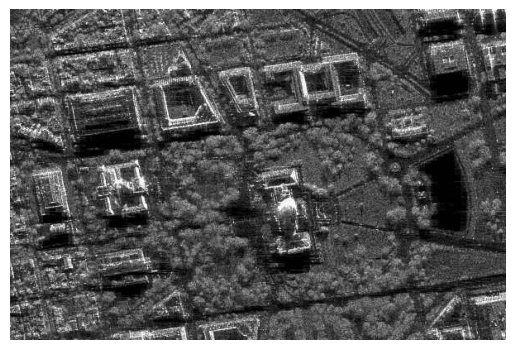

In [111]:
image = cv2.imread('sar_1_gray.jpg')
plt.imshow(image, cmap='gray')
plt.axis("off")
plt.show()


2. Гистограмма, кумулятивная гистограмма, нормализованная гистограмма

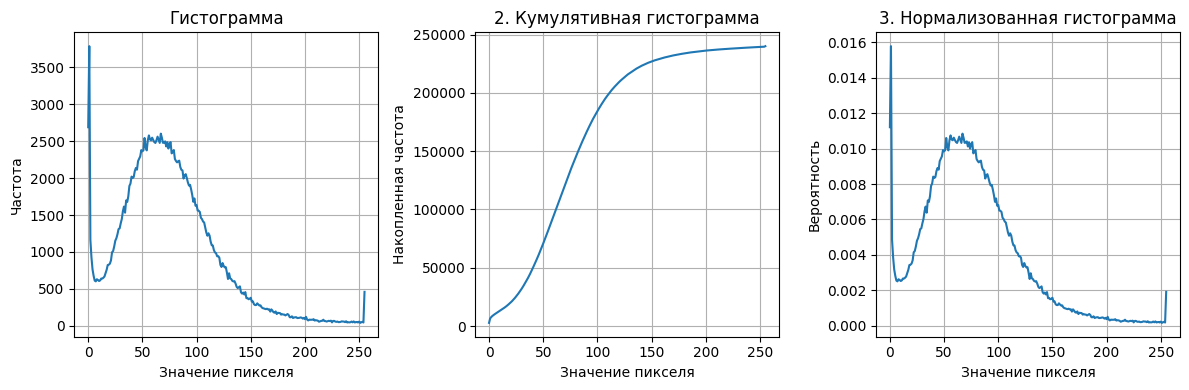

In [ ]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange, accumulate=accumulate)
b_hist_cum = b_hist.cumsum()
b_hist_norm = b_hist / (image.shape[0] * image.shape[1])

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(b_hist)
plt.title('Гистограмма')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(b_hist_cum)
plt.title('2. Кумулятивная гистограмма')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(b_hist_norm)
plt.title('3. Нормализованная гистограмма')
plt.grid(True)


plt.tight_layout()
plt.show()
print(" ")
print(" ")


3. Алгоритм гамма коррекции с параметром гамма <1, >1.

In [104]:
gamma1 = 0.65
normalized = image / 255.0
corrected = np.power(normalized, gamma1)
corrected_image_1 = (corrected * 255).astype(np.uint8)

In [101]:
gamma2 = 6.5
normalized = image / 255.0
corrected = np.power(normalized, gamma2)
corrected_image_2 = (corrected * 255).astype(np.uint8)

4. Сравнение исходного изображения, скорректированного при помощи гамма-фильтра. MSE, SSIM.

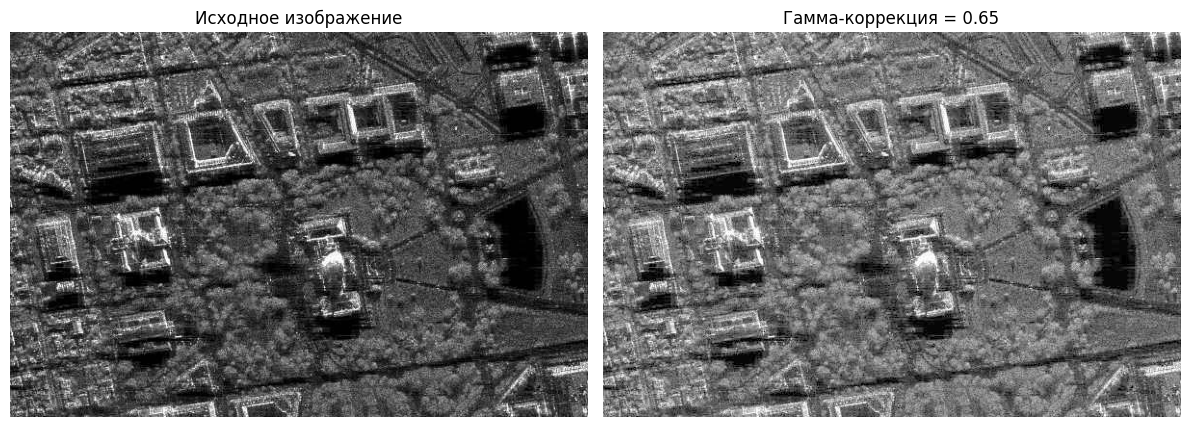

In [105]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corrected_image_1, cmap='gray')
plt.title(f"Гамма-коррекция = {gamma1}")
plt.axis('off')

plt.tight_layout()
plt.show()

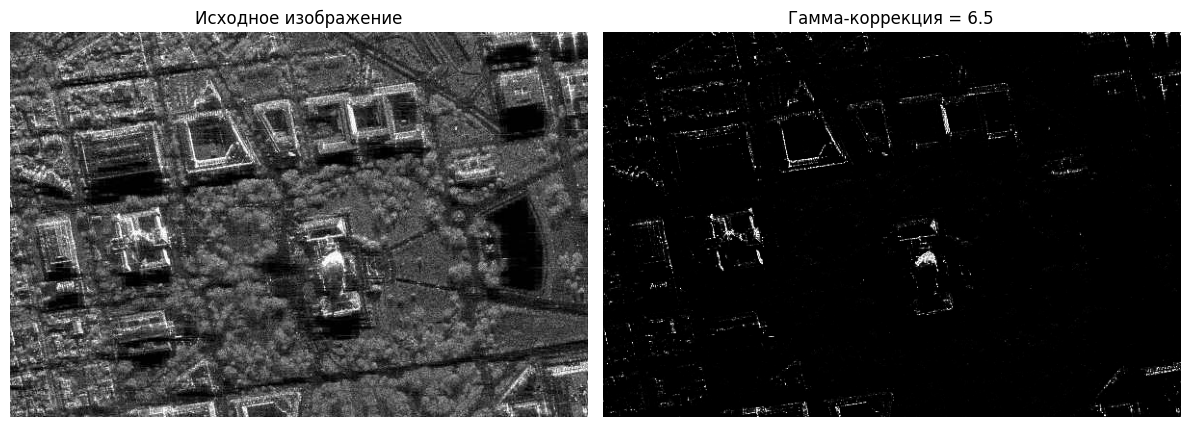

In [103]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Исходное изображение")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corrected_image_2, cmap='gray')
plt.title(f"Гамма-коррекция = {gamma2}")
plt.axis('off')

plt.tight_layout()
plt.show()

In [95]:
from skimage.metrics import structural_similarity, mean_squared_error
gray_original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_corrected = cv2.cvtColor(corrected_image, cv2.COLOR_BGR2GRAY)

(ssim, diff) = structural_similarity(gray_original, gray_corrected, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

mse = mean_squared_error(gray_original, gray_corrected)
print(f"MSE: {mse}")

SSIM: 0.04460715054798654
MSE: 6517.200170833334


5. Статистическая цветокоррекция на основе статистики eq_gray.

Text(0.5, 1.0, 'Коррекция\nmean: 123.1, std: 65.3')

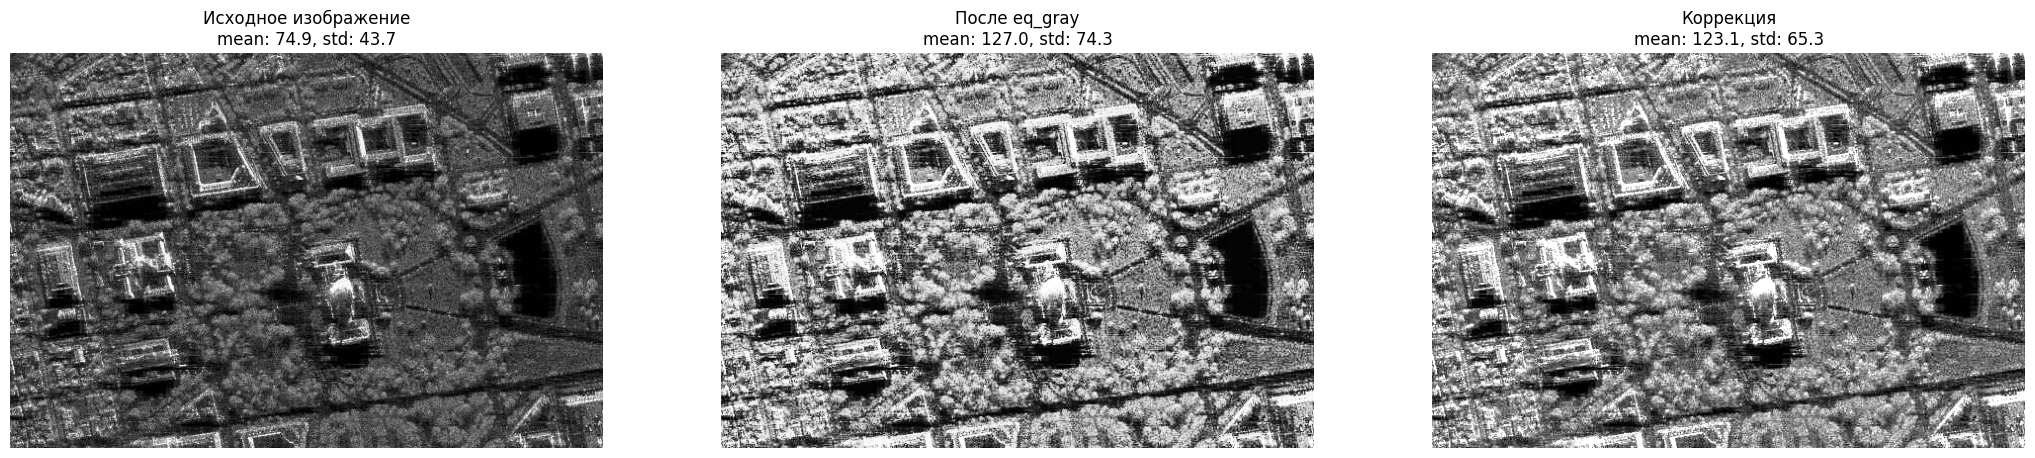

In [113]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

mean = img_gray.mean()
std = img_gray.std()

eq_gray = cv2.equalizeHist(img_gray)

mean_eq_gray = eq_gray.mean()
std_eq_gray  = eq_gray.std()

corrected_img = mean_eq_gray + (img_gray.astype(np.float32)- mean) * (std_eq_gray / std)
corrected_img = np.clip(corrected_img, 0, 255).astype(np.uint8)
mean_cor = corrected_img.mean()
std_cor  = corrected_img.std()
plt.figure(figsize=(26, 6))
plt.subplot(1,3,1)
plt.imshow(img_gray, cmap='gray')
plt.axis("off")
plt.title(f'Исходное изображение\nmean: {mean:.1f}, std: {std:.1f}')
plt.subplot(1,3,2)
plt.imshow(eq_gray, cmap="gray")
plt.axis("off")
plt.title(f'После eq_gray\nmean: {mean_eq_gray:.1f}, std: {std_eq_gray:.1f}')
plt.subplot(1,3,3)
plt.imshow(corrected_img, cmap='gray')
plt.axis("off")
plt.title(f'Коррекция\nmean: {mean_cor:.1f}, std: {std_cor:.1f}')


6. Пороговая фильтрация

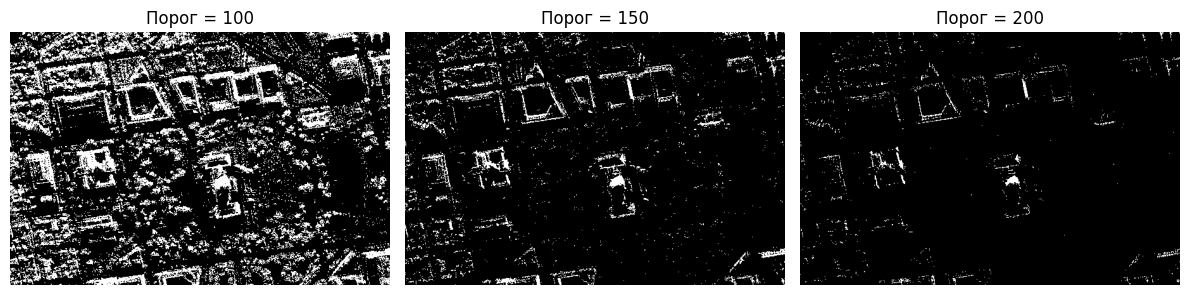

In [109]:
_, thresh1 = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
_, thresh3 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(thresh1, cmap='gray')
plt.title('Порог = 100')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh2, cmap='gray')
plt.title('Порог = 150')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thresh3, cmap='gray')
plt.title('Порог = 200')
plt.axis('off')

plt.tight_layout()
plt.show()